# Example 1: GeoLineStrings

In [1]:
# import the geolinestring class
from geolinestring import GeoLineString
%matplotlib inline

## 1. (X, Y, Z) Data

In [2]:
# Given x,y,z coordinates
coordinates_1 = [[1, 1, 1], [1, 1, 5], [1, 8, 5], [3, 3, 3],[5,1,2],[6,10,2]]
coordinates_2 = [[6,10,2],[3,3,3],[5,5,8],[5, 5, 5], [5, 5, 1], [3, 3, 3], [2, 2, 1]]

# Lets define two geolinestrings
# Since the data provided is already in X,Y coordinates, we can pass the argument: isXY=True
gls1 = GeoLineString(coordinates_1, isXY=True)
gls2 = GeoLineString(coordinates_2, isXY=True)

In [3]:
# There are two known intersections in the above sample data: [3, 3, 3] and [6, 10, 2]

# GeoLineStrings support .intersects() and .intersection() functions that are found in shapely

print(gls1.intersects(gls2))

True


In [4]:
print(gls1.intersection(gls2)) ## Returns the intersection locations

[[ 3.  3.  3.]
 [ 6. 10.  2.]]


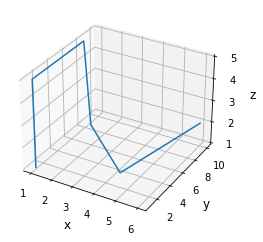

In [5]:
# GeoLineStrings also have a helper function to view the 3D linestring
gls1.plot()

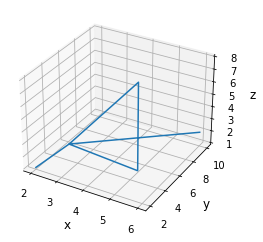

In [6]:
# gls2 plot
gls2.plot()

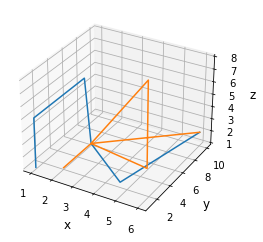

In [7]:
# You can also pass the second linestring to the plot function to plot both on the same figure
gls1.plot(gls2)

## 2. (Longitude, Latitude, Altitude) Data

The required format for the GeoLineString is (Longitude, Latitude, Altitude)

All units should be specified in meters.

When working with (Lon., Lat., Alt) data you will need to specify two transformation EPSG codes:
* epsg_from: Where the coordinates are being transformed from
* epsg_proj: Where to project the coordinate transformation

The default epsg_from field is set to epsg:4326, which is most likely suitable for most needs https://epsg.io/4326

The deault epsg_proj field is set to the US National Atlas Equal Area https://epsg.io/2163, which one may need to change based on the focal area of the data

In [8]:
coordinates_3 = [[-71,42, 100], [-71.3, 42, 100], [-72,41,500],[-71.2,42.5, 100]]
coordinates_4 = [[-71.2,42.5, 100], [-71.3, 42, 100], [-71,41,100]]

In [9]:
# Lets define two additional geolinestrings
# Since the data provided is in (lon,lat,alt) coordinates, we omit the isXY=True field
gls3 = GeoLineString(coordinates_3, epsg_proj='epsg:2163')
gls4 = GeoLineString(coordinates_4) # epsg_proj default is 'epsg:2163'

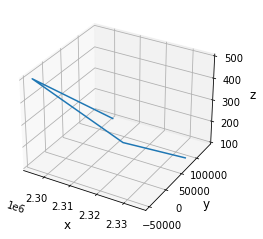

In [10]:
gls3.plot()

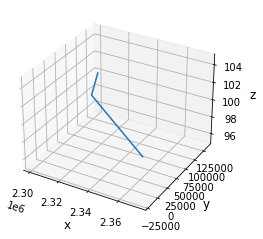

In [11]:
gls4.plot()

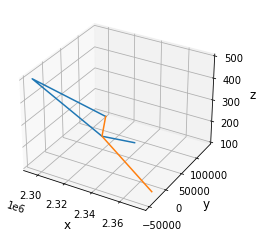

In [12]:
gls3.plot(gls4)

In [13]:
print(gls3.intersects(gls4))

True


In [14]:
print(gls3.intersection(gls4))

[[2.30084261e+06 1.35167639e+05 1.00000000e+02]
 [2.31208049e+06 7.91798511e+04 1.00000000e+02]]


In [15]:
print(gls3.intersection(gls4,lonlat=True)) # intersection in X,Y coordinates

[[-71.2  42.5 100. ]
 [-71.3  42.  100. ]]
